In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import random
from tqdm import tqdm
import cv2
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import pickle
import numpy as np

In [3]:
p = open('/content/drive/MyDrive/Tensorflow/train_imgs.pickle', 'rb')
train_imgs_np = pickle.load(p)

In [4]:
p2 = open('/content/drive/MyDrive/Tensorflow/train_labels.pickle', 'rb')
train_labels_np = pickle.load(p2)

In [5]:
print(train_imgs_np.shape, train_labels_np.shape)

(18500, 256, 256, 3) (18500,)


In [6]:
model = tf.keras.Sequential([
    tf.keras.Input(shape=(256,256,3)),
    tf.keras.layers.Conv2D(filters = 64, kernel_size=(3,3), padding="same", activation="relu"),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters = 128, kernel_size=(5,5), padding="same", activation="relu"),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters = 256, kernel_size=(5,5), padding="same", activation="relu"),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters = 512, kernel_size=(5,5), padding="same", activation="relu"),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters = 512, kernel_size=(5,5), padding="same", activation="relu"),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units = 256, activation='relu'),
    tf.keras.layers.Dense(units = 256, activation='relu'),
    tf.keras.layers.Dense(units = 64, activation='relu'),
    tf.keras.layers.Dropout(0.45),
    tf.keras.layers.Dense(units = 37, activation='softmax')

])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 128, 128, 64)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 128)     204928    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 64, 64, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 256)       819456    
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 32, 32, 256)       0

In [7]:
model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.00001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
)

In [8]:
h = model.fit(
    x=train_imgs_np,
    y=train_labels_np,
    epochs=30,  # Adjust the number of epochs as needed
    validation_split=0.25,  # Set a suitable validation split
    batch_size=150,  # Adjust the batch size as needed
    callbacks=[tf.keras.callbacks.EarlyStopping(patience=5)],  # Early stopping to prevent overfitting
    verbose=1
)


Epoch 1/30
93/93 [==============================] - 290s 2s/step - loss: 3.7842 - accuracy: 0.0271 - val_loss: 3.6038 - val_accuracy: 0.0298
Epoch 2/30
93/93 [==============================] - 153s 2s/step - loss: 3.5970 - accuracy: 0.0333 - val_loss: 3.5821 - val_accuracy: 0.0376
Epoch 3/30
93/93 [==============================] - 151s 2s/step - loss: 3.5772 - accuracy: 0.0377 - val_loss: 3.5570 - val_accuracy: 0.0398
Epoch 4/30
93/93 [==============================] - 151s 2s/step - loss: 3.5449 - accuracy: 0.0435 - val_loss: 3.4787 - val_accuracy: 0.0696
Epoch 5/30
93/93 [==============================] - 152s 2s/step - loss: 3.4976 - accuracy: 0.0566 - val_loss: 3.4476 - val_accuracy: 0.0863
Epoch 6/30
93/93 [==============================] - 154s 2s/step - loss: 3.4385 - accuracy: 0.0734 - val_loss: 3.3487 - val_accuracy: 0.1181
Epoch 7/30
93/93 [==============================] - 154s 2s/step - loss: 3.3553 - accuracy: 0.0958 - val_loss: 3.2903 - val_accuracy: 0.1442
Epoch 8/30
93

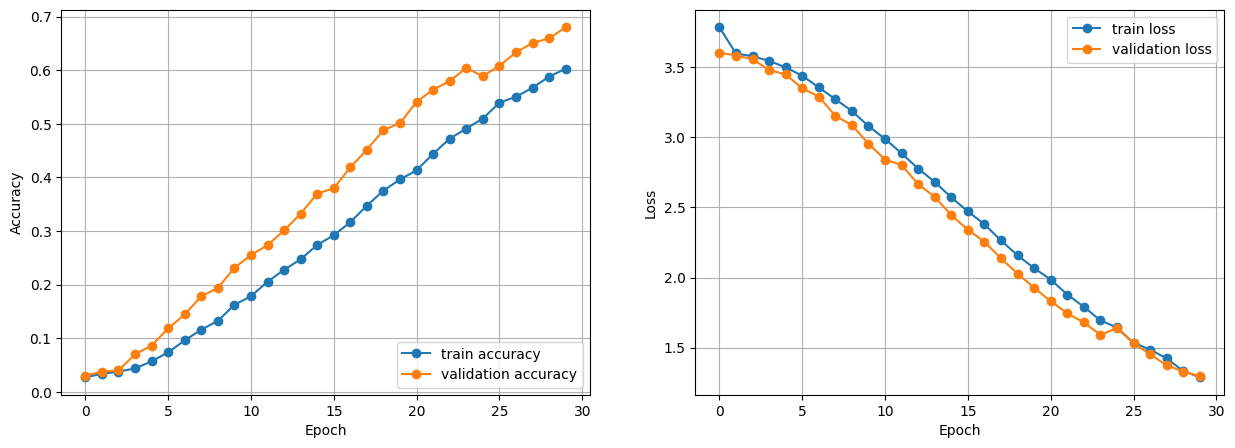

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [9]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

model.save('18500dataModel.h5')

In [10]:
model.save('18500dataModel.h5')